# Chicago Crime Data Analysis

The City of Chicago makes available through its Data Portal (data.cityofchicago.org) access to government data. The site hosts over 200 datasets presented in easy-to-use formats about City departments, services, facilities and performance.  
The dataset used in this analysis contains crime reports from 2001 to present date but filtered to consider just occurrences of January and February of 2017.  
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

Disclaimer: This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

You are a data scientist helping the City of Chicago makes sense of the data collected in order to find important patterns about how to improve law enforcement actions to prevent crime.
Your analysis must be able to address the following requests:
1. What are the top 12 most common crimes of the period?
2. What are the crime types that have median above 50 crimes/day?
3. For each crime type identified in the last question, use the latitude and longitude into a KDE plot, to analyse its spread.
4. For each crime type plotted into KDE, discover the mean of the coordinates (latitude and longitude).
5. Go to google maps, plot the coordinates and investigate if the distances are close or not, what could indicate that the area should have more investment in public security.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

In [2]:
data = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/Chicago Crime Data Analysis/Crimes_2017.csv')
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [3]:
data.columns = ['ID','CaseNumber','Date','Block','IUCR', 'PrimaryType',
       'Description', 'LocationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'CommunityArea', 'FBICode', 'x',
       'y', 'Year', 'UpdatedOn', 'Latitude', 'Longitude',
       'Location']
display(data.head())

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,x,y,Year,UpdatedOn,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [4]:
data.dtypes

ID                       int64
CaseNumber              object
Date                    object
Block                   object
IUCR                    object
PrimaryType             object
Description             object
LocationDescription     object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                 int64
Ward                     int64
CommunityArea            int64
FBICode                 object
x                      float64
y                      float64
Year                     int64
UpdatedOn               object
Latitude               float64
Longitude              float64
Location                object
dtype: object

In [5]:
data.dropna(inplace=True,axis=0)      # axis = 0 means we are dropping rows

In [6]:
data['PrimaryType'] = data['PrimaryType'].astype('category',ordered=False)

In [7]:
data.head(2).transpose()

,11,12
ID,10848634,10848098
CaseNumber,JA152844,JA152244
Date,01/01/2017 12:01:00 AM,01/01/2017 12:01:00 AM
Block,066XX S KNOX AVE,087XX S STATE ST
IUCR,1562,1152
PrimaryType,SEX OFFENSE,DECEPTIVE PRACTICE
Description,AGG CRIMINAL SEXUAL ABUSE,ILLEGAL USE CASH CARD
LocationDescription,RESIDENCE,GROCERY FOOD STORE
Arrest,False,False
Domestic,False,False


In [8]:
data['Date'] = pd.to_datetime(data['Date'].str[0:10], format='%m/%d/%Y')

In [9]:
data.dtypes

ID                              int64
CaseNumber                     object
Date                   datetime64[ns]
Block                          object
IUCR                           object
PrimaryType                  category
Description                    object
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                        int64
Ward                            int64
CommunityArea                   int64
FBICode                        object
x                             float64
y                             float64
Year                            int64
UpdatedOn                      object
Latitude                      float64
Longitude                     float64
Location                       object
dtype: object

---

## 1

In [10]:
top12 = data[['PrimaryType','CaseNumber']].groupby('PrimaryType').agg('count').sort_values('CaseNumber',ascending = False).head(12)
top12.reset_index(inplace=True)
top12.columns = ['CrimeType','Quantity']
top12

,CrimeType,Quantity
0,THEFT,8834
1,BATTERY,6730
2,CRIMINAL DAMAGE,4328
3,OTHER OFFENSE,2764
4,ASSAULT,2577
5,DECEPTIVE PRACTICE,2331
6,BURGLARY,2163
7,MOTOR VEHICLE THEFT,2012
8,ROBBERY,1820
9,NARCOTICS,1483


---

## 2

In [11]:
crime_by_day = data[['PrimaryType','Date','CaseNumber']].groupby(['PrimaryType','Date']).agg('count')
crime_by_day.reset_index(inplace=True)
crime_by_day.columns = ['CrimeType','Date','Quantity']
crime_by_day.head()

,CrimeType,Date,Quantity
0,ARSON,2017-01-01,NaN
1,ARSON,2017-01-02,3.0
2,ARSON,2017-01-03,1.0
3,ARSON,2017-01-04,1.0
4,ARSON,2017-01-05,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

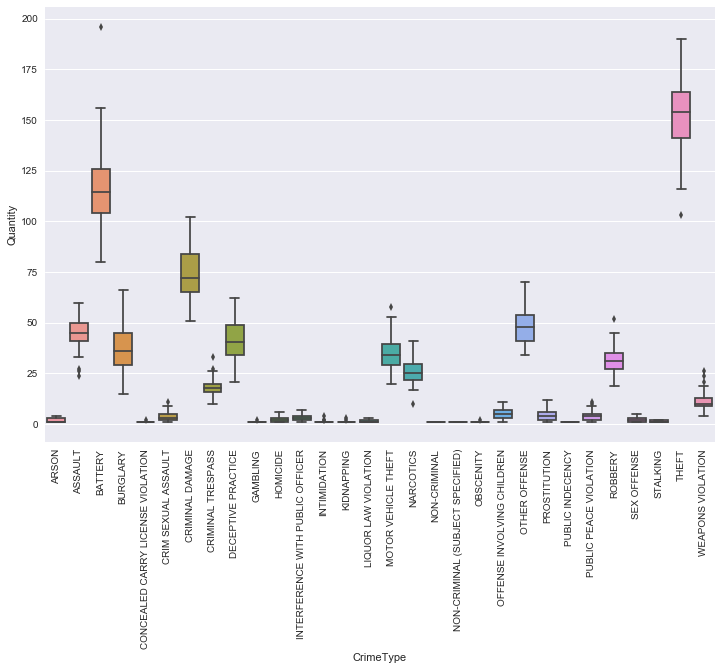

In [12]:
p = sns.boxplot(data = crime_by_day,x='CrimeType',y='Quantity')
plt.xticks(rotation=90)

In [35]:
f = crime_by_day[(crime_by_day.CrimeType == 'BATTERY') | (crime_by_day.CrimeType == 'CRIMINAL DAMAGE') | (crime_by_day.CrimeType == 'THEFT')]
f.reset_index(inplace=False)
f.head()

,CrimeType,Date,Quantity
116,BATTERY,2017-01-01,196.0
117,BATTERY,2017-01-02,105.0
118,BATTERY,2017-01-03,111.0
119,BATTERY,2017-01-04,94.0
120,BATTERY,2017-01-05,84.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

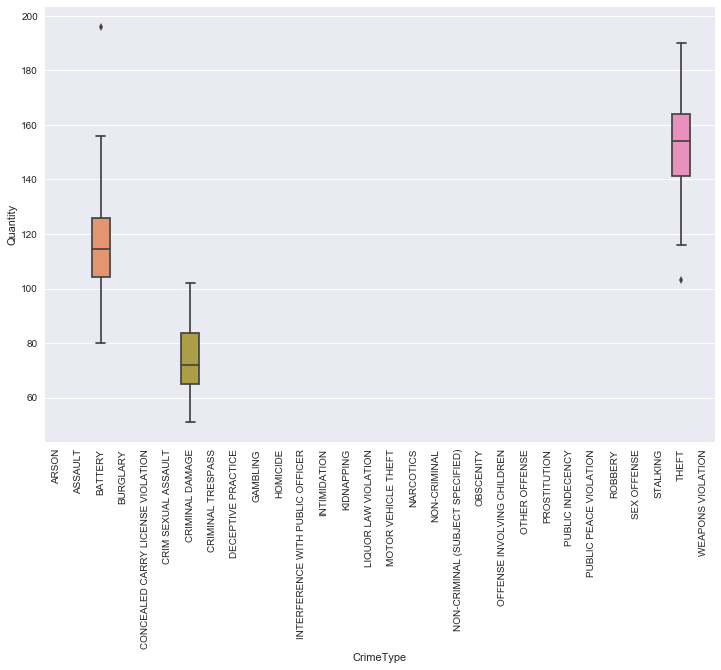

In [23]:
p = sns.boxplot(data = f,x='CrimeType',y='Quantity')
plt.xticks(rotation=90)

**These are the crimes with median > 50 times a day**

---

## 3. KDE Plots

In [14]:
theft = data[['Latitude','Longitude']][data.PrimaryType =='THEFT']
battery = data[['Latitude','Longitude']][data.PrimaryType =='BATTERY']
criminal_damage = data[['Latitude','Longitude']][data.PrimaryType =='CRIMINAL DAMAGE']

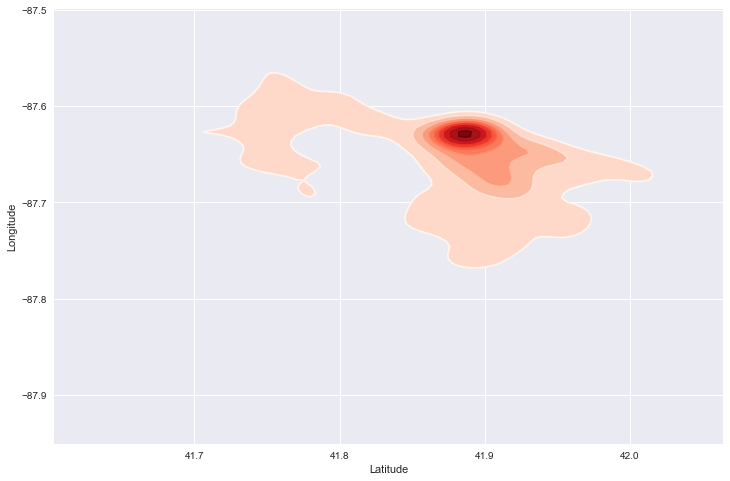

In [15]:
p1 = sns.kdeplot(theft.Latitude, theft.Longitude, cmap='Reds', shade=True, shade_lowest=False)
p12 = sns.kdeplot(theft.Latitude, theft.Longitude, cmap='Reds')

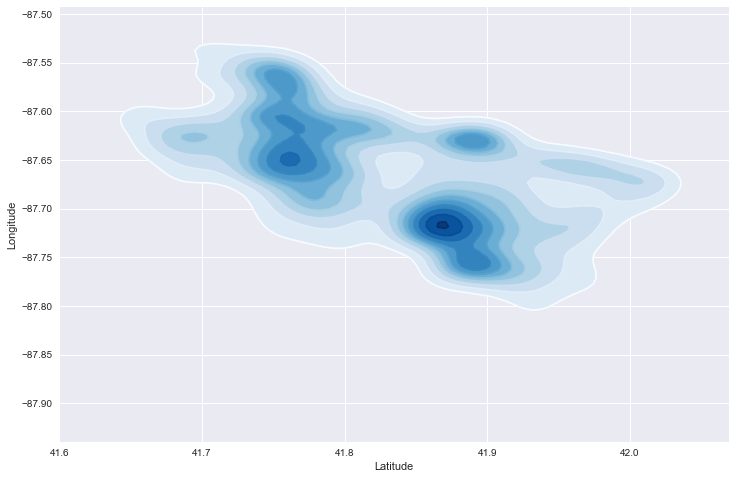

In [16]:
p2 = sns.kdeplot(battery.Latitude, battery.Longitude,cmap='Blues', shade=True, shade_lowest=False)

p22 = sns.kdeplot(battery.Latitude, battery.Longitude,cmap='Blues')

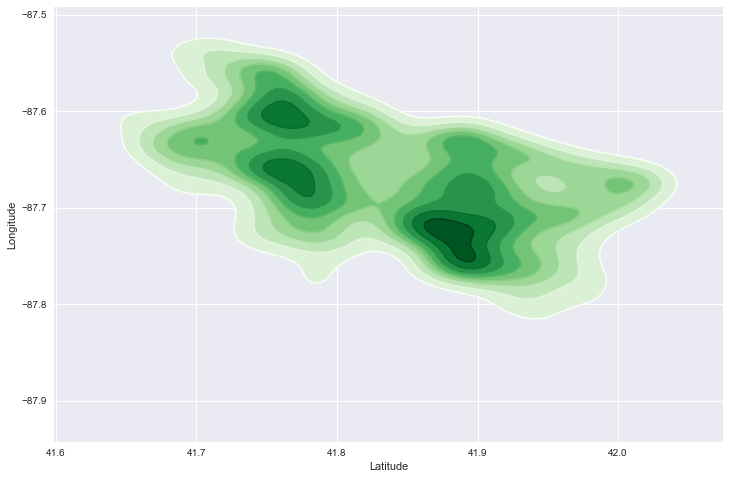

In [17]:
p3 = sns.kdeplot(criminal_damage.Latitude, criminal_damage.Longitude, cmap='Greens', shade=True, shade_lowest=False)
p32 = sns.kdeplot(criminal_damage.Latitude, criminal_damage.Longitude, cmap='Greens')

---

## 4

In [18]:
theft_lat_mean = theft.Latitude.mean()
theft_long_mean = theft.Longitude.mean()
battery_lat_mean = battery.Latitude.mean()
battery_long_mean = battery.Longitude.mean()
cd_lat_mean = criminal_damage.Latitude.mean()
cd_long_mean = criminal_damage.Longitude.mean()

In [19]:
print('THEFT Mean Co-ordinates: (%f,%f)\nBATTERY Mean Co-ordinates: (%f,%f)\nCRIMINAL DAMAGE Mean Co-ordinates: (%f,%f)'%(theft_lat_mean,theft_long_mean,battery_lat_mean,battery_long_mean,cd_lat_mean,cd_long_mean))

THEFT Mean Co-ordinates: (41.862720,-87.667282)
BATTERY Mean Co-ordinates: (41.831977,-87.668571)
CRIMINAL DAMAGE Mean Co-ordinates: (41.837694,-87.673674)


---

## 5

These places are nearby

https://www.google.com/maps/dir/'41.862720,-87.667282'/'41.831977,-87.668571'/'41.837694,-87.673674'/@41.8476513,-87.6871808,14z/data=!3m1!4b1!4m14!4m13!1m3!2m2!1d-87.667282!2d41.86272!1m3!2m2!1d-87.668571!2d41.831977!1m3!2m2!1d-87.673674!2d41.837694!3e0
    


In [20]:
import os

In [21]:
os.getcwd()

'/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/Chicago Crime Data Analysis'

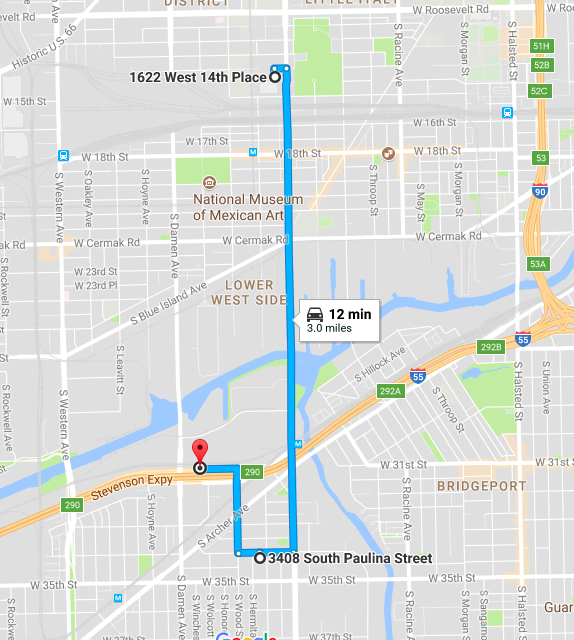

In [22]:
from IPython.display import Image

Image(filename = 'Map.png',width=400,height=400)